# quickstart.ipynb
This notebook demonstrates the basics of using Generating Chronicling to query and download from the [Chronicling America database](https://chroniclingamerica.loc.gov/) of historical newspapers. For a more advanced demonstration, see `usage.ipynb`. For an installation guide and a more detailed explanation of the code, see `README.md`.

## Getting Started
Import the `query`, `limit`, and `download`, and `process` modules and initialize `ChronAmRateLimiter` object.

In [1]:
%reload_ext autoreload
%autoreload 2

from modules.query import *
from modules.limit import *
from modules.download import *
from modules.process import *

limiter = ChronAmRateLimiter()

## Making a Query
Initialize a `ChronAmQuery` object from a URL and retrieve the corresponding IDs. The URL used here comes from a search for Massachusetts newspapers published between 1900 and 1910 and containing the word "generative."

In [2]:
query = ChronAmBasicQuery.from_url('https://chroniclingamerica.loc.gov/search/pages/results/?state=Massachusetts&date1=1900&date2=1910&proxtext=generative&x=23&y=9&dateFilterType=yearRange&rows=20&searchType=basic')
print(query)

ChronAmBasicQuery(
	description: "140424916262672"
	state: Massachusetts
	date1: 1900-01-01
	date2: 1910-12-31
	proxtext: ['generative']
{})


`retrieve_all()` will retrieve 50 results from Chronicling America search

In [3]:
query.retrieve_all(50, limiter)

INFO: found 21072 results for query 140424916262672
INFO: updated query "140424916262672" with 50 items.


50

now we can view some of the retrieved IDs:

In [4]:
list(query.results.values())[:5]

['sn86086481/1903-09-11/ed-1/seq-9/',
 'sn83020847/1902-04-18/ed-1/seq-2/',
 'sn86086481/1902-12-25/ed-1/seq-5/',
 'sn83020847/1906-11-22/ed-1/seq-1/',
 'sn86086481/1900-03-06/ed-1/seq-7/']

`dump_txt()` will write the results to a text file—make sure that the `data` directory exists before running

In [5]:
query.dump_txt('data/query.txt')

50

## Downloading Files
Downloads TXT files associated with the results of the query—make sure that the `data/files` directory exists before running

In [6]:
loader = ChronAmDownloader.from_file('data/query.txt', 'data/files/', limiter)
list(loader.ids.keys())[:5]

['sn86086481/1903-09-11/ed-1/seq-9/',
 'sn83020847/1902-04-18/ed-1/seq-2/',
 'sn86086481/1902-12-25/ed-1/seq-5/',
 'sn83020847/1906-11-22/ed-1/seq-1/',
 'sn86086481/1900-03-06/ed-1/seq-7/']

`download_all()` will retrieve the text files for the IDs in `loader`

In [7]:
loader.download_all('txt')

INFO: 50 files of type "txt" already present; 0 not found.
INFO: 0 downloaded, 0 failed, 50 skipped.


(0, 0, 50)

In [8]:
loader.paths[:5]

['data/files/sn86086481/1903-09-11/ed-1/seq-9.txt',
 'data/files/sn83020847/1902-04-18/ed-1/seq-2.txt',
 'data/files/sn86086481/1902-12-25/ed-1/seq-5.txt',
 'data/files/sn83020847/1906-11-22/ed-1/seq-1.txt',
 'data/files/sn86086481/1900-03-06/ed-1/seq-7.txt']

now we can read the downloaded text files; this cell will print the first five lines of the first files

In [9]:
with open(loader.paths[0], 'r') as fp:
    for i in range(10):
        print(fp.readline(), end='')

• Jr* * ^SyX.^^O^
’/\K
^Ep-
The monkey thought that while the South African marksmen were at
lunch he would try his hand at the target. Can you find the two friends he
hit?
In yesterday's puzzle, by using the upper part of the picture as base,
Helen can be found toward the right, her features being formed by the speaker.
PENSION LISI'
UNDER MILLION


## Processing XML Files

Use `download_all()` again to download the `xml` files for our query:

In [10]:
loader.download_all('xml')

INFO: 50 files of type "xml" already present; 0 not found.
INFO: 0 downloaded, 0 failed, 50 skipped.


(0, 0, 50)

Initialize the `ChronAmXMLProcessor` object from the downloaded files:

In [11]:
processor = ChronAmXMLProcessor('data/files')

INFO: found 50 XML files in directory data/files


Use the `process_xml()` method to process a single XML file:

In [12]:
json_path = processor.process_xml(processor.files[0])
print(json_path)

data/files/sn83020847/1902-04-18/ed-1/seq-2.json


Check out the first 10 lines of the resulting JSON file:

In [13]:
with open(json_path, 'r') as fp:
    for i in range(10):
        print(fp.readline(), end='')

{
    "P2_TB00009": {
        "P2_TL01156": {
            "P2_ST08072": {
                "content": "2"
            }
        }
    },
    "P2_TB00001": {
        "P2_TL00001": {


Use `process_all()` to process the rest of the XML files:

In [25]:
json_paths = processor.process_all()
json_paths[:5]

['data/files/sn83020847/1902-04-18/ed-1/seq-2.json',
 'data/files/sn83020847/1910-12-29/ed-1/seq-6.json',
 'data/files/sn83020847/1903-09-18/ed-1/seq-11.json',
 'data/files/sn83020847/1906-11-22/ed-1/seq-1.json',
 'data/files/sn86086481/1900-03-06/ed-1/seq-7.json']

## Clipping Text
> **NOTE**: Working with images requires additional installation and setup. See the **Download & Installation** section in `README.md`.

First, we need to download the JP2 files:

In [23]:
loader.download_all('jp2')

INFO: 49 files of type "jp2" already present; 1 not found.
INFO: 1 downloaded, 0 failed, 49 skipped.


(1, 0, 49)

Next, we import the `clip` module and intialize a `ChronAmJP2Clipper` from the processed JSON:

In [27]:
from modules.clip import *

clipper = ChronAmJP2Clipper('data/files')
clipper.files[:5]

['data/files/sn83020847/1902-04-18/ed-1/seq-2',
 'data/files/sn83020847/1910-12-29/ed-1/seq-6',
 'data/files/sn83020847/1903-09-18/ed-1/seq-11',
 'data/files/sn83020847/1906-11-22/ed-1/seq-1',
 'data/files/sn86086481/1900-03-06/ed-1/seq-7']

To clip images, we need to rerun the XML processor with instructions to extract bounding box data. Notice that we also specify to overwrite the previous data:

In [43]:
json_paths = processor.process_all(include_bounding_box=True, overwrite=True)
json_paths[:5]

['data/files/sn83020847/1902-04-18/ed-1/seq-2.json',
 'data/files/sn83020847/1910-12-29/ed-1/seq-6.json',
 'data/files/sn83020847/1903-09-18/ed-1/seq-11.json',
 'data/files/sn83020847/1906-11-22/ed-1/seq-1.json',
 'data/files/sn86086481/1900-03-06/ed-1/seq-7.json']

Now we can clip out all of the lines from the first image:

In [58]:
clipped, clippings_dir = clipper.clip(clipper.files[0], 'line')

INFO: saved 1156 clippings to data/files/sn83020847/1902-04-18/ed-1/clippings-line.


Now let's check out some examples of the clippings. Running this cell will produce a randomly generated "poem."

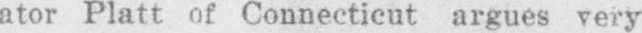

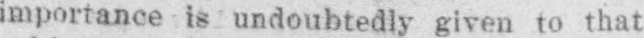

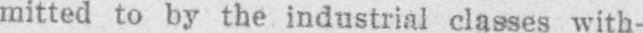

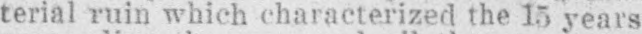

In [71]:
from IPython.display import display, Image
from random import sample
from os import listdir, path

# randomly sample and display five lines
clippings = [path.join(clippings_dir, filename) for filename in listdir(clippings_dir)]
for clipping in sample(clippings, 5):
    display(Image(filename=clipping))